In [1]:
try:
    import bccr
except ImportError:
    print('Module bccr missing. Installing it now')
    !pip install bccr

In [2]:
from bccr import SW
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
SW.buscar(todos='inflación subyacente')

,DESCRIPCION,descripcion,Unidad,Medida,periodo
codigo,,,,,
1264,"Node('/BCCR/Índices de Precios/Indice Subyacente de inflación (ISI), (Julio 2006 = 100) [1264]')",(ISI) INDICE SUBYACENTE DE INFLACION (BASE JULIO 2006=100),Nivel,NO DEFINIDO,Mensual
1267,"Node('/BCCR/Índices de Precios/Indice Subyacente de inflación (ISI), (Julio 2006 = 100) [1267]')",INDICE SUBYACENTE DE INFLACION VARIACION INTERANUAL,Porcentaje Variación Interanual,NO DEFINIDO,Mensual
4160,"Node('/BCCR/Índices de Precios/Indice Subyacente de inflación (ISI), (Julio 2006 = 100) [1264]/Bienes [4160]')",Bienes,Nivel,Unidades,Mensual
27118,"Node('/BCCR/Índices de Precios/Indice Subyacente de inflación (ISI), (Julio 2006 = 100) [1267]/Bienes [27118]')",Bienes,Porcentaje Variación Interanual,NO DEFINIDO,Mensual
4181,"Node('/BCCR/Índices de Precios/Indice Subyacente de inflación (ISI), (Julio 2006 = 100) [1264]/Servicios [4181]')",Servicios,Nivel,Unidades,Mensual
27119,"Node('/BCCR/Índices de Precios/Indice Subyacente de inflación (ISI), (Julio 2006 = 100) [1267]/Servicios [27119]')",Servicios,Porcentaje Variación Interanual,NO DEFINIDO,Mensual
24171,Node('/BCCR/Índices de Precios/Inflación subyacente reponderada por persistencia [24171]'),Inflación subyacente reponderada por persistencia,Nivel,Unidades,Mensual
24172,Node('/BCCR/Índices de Precios/Inflación subyacente reponderada por persistencia [24172]'),Inflación subyacente reponderada por persistencia,Porcentaje Variación Interanual,Unidades,Mensual
24174,Node('/BCCR/Índices de Precios/Inflación subyacente reponderada por volatilidad [24174]'),Inflación subyacente reponderada por volatilidad,Nivel,Unidades,Mensual


In [4]:
isi = SW(isi=25725).dropna()
isi

,isi
fecha,
2006-08,0.895052
2006-09,0.236138
2006-10,0.524076
2006-11,0.601677
2006-12,0.730769
...,...
2020-08,0.266575
2020-09,0.270565
2020-10,0.099647


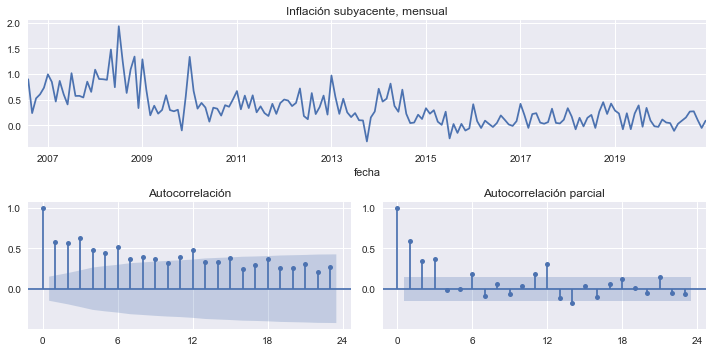

In [5]:
fig, axs = plt.subplot_mosaic(
    """
    AA
    BC
    """, figsize=[10,5], tight_layout=True)#, sharey='row')

isi.plot(ax=axs['A'], title='Inflación subyacente, mensual', legend=None)
plot_acf(isi, ax=axs['B'], title='Autocorrelación')
plot_pacf(isi, ax=axs['C'], title='Autocorrelación parcial');
axs['B'].set_xticks(range(0,30,6))
axs['C'].set_xticks(range(0,30,6))
axs['C'].sharey(axs['B'])
fig.savefig('ISI-AR3.pdf', bbox_inches='tight')

In [6]:
res = ARIMA(isi, order=[3,0,0]).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    isi   No. Observations:                  173
Model:                 ARIMA(3, 0, 0)   Log Likelihood                  -4.734
Date:                Sun, 24 Apr 2022   AIC                             19.468
Time:                        16:23:33   BIC                             35.234
Sample:                    08-31-2006   HQIC                            25.864
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3406      0.116      2.939      0.003       0.113       0.568
ar.L1          0.2630      0.069      3.787      0.000       0.127       0.399
ar.L2          0.1983      0.050      3.998      0.000       0.101       0.296
ar.L3          0.3646      0.069      5.270      0.000       0.229       0.500
sigma2         0.0615      0.005     12.753      0.000       0.052       0.071
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                96.24
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                             1.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
sss = res.summary()

with open('AR3-ISI.tex','w') as file:
    file.write(sss.tables[1].as_latex_tabular())

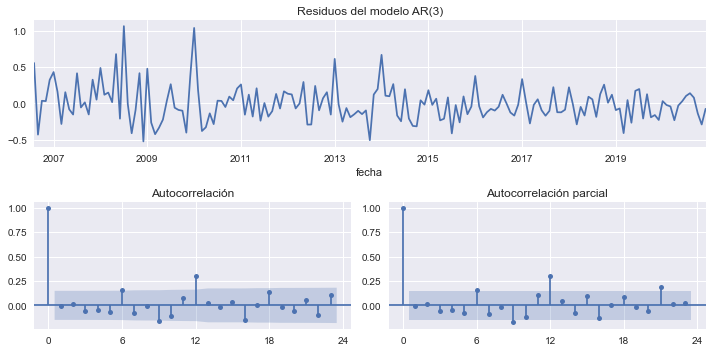

In [8]:
fig, axs = plt.subplot_mosaic(
    """
    AA
    BC
    """, figsize=[10,5], tight_layout=True)#, sharey='row')

res.resid.plot(ax=axs['A'], title='Residuos del modelo AR(3)', legend=None)
plot_acf(res.resid, ax=axs['B'], title='Autocorrelación')
plot_pacf(res.resid, ax=axs['C'], title='Autocorrelación parcial')
axs['B'].set_xticks(range(0,30,6))
axs['C'].set_xticks(range(0,30,6))
axs['C'].sharey(axs['B'])
fig.savefig('ISI-AR3resid.pdf', bbox_inches='tight')

In [9]:
1 / res.arroots

array([ 0.91510159+0.j       , -0.32602757+0.5404744j,
       -0.32602757-0.5404744j])

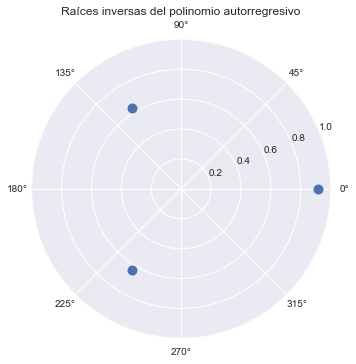

In [10]:
arroots = 1/res.arroots

plt.polar(np.angle(arroots), np.abs(arroots), '.', ms=20)
fig = plt.gcf()
ax = fig.gca()
ax.set_rlim([0,1])
ax.set_title('Raíces inversas del polinomio autorregresivo')
fig.savefig('ISI-AR3roots.pdf', bbox_inches='tight')

In [11]:
pmax = 4
qmax = 2
P = np.arange(pmax+1)
Q = np.arange(qmax+1)

In [12]:
aic = [[ARIMA(isi, order=[p,0,q]).fit().aic for q in Q ] for p in P ]
AIC = pd.DataFrame(aic, index=[f'p={p}' for p in P], columns=[f'q={q}' for q in Q])
AIC.style.highlight_min()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


,q=0,q=1,q=2
p=0,131.620888,89.023411,82.401382
p=1,60.759065,25.081481,26.533141
p=2,41.690410,26.708214,28.697323
p=3,19.467588,21.346944,23.220068
p=4,21.338571,23.338547,19.543282


In [13]:
AIC.round(2).to_latex('ISI-AR3aic.tex')

In [14]:
bic = [[ARIMA(isi, order=[p,0,q]).fit().bic for q in Q ] for p in P ]
BIC = pd.DataFrame(bic, index=[f'p={p}' for p in P], columns=[f'q={q}' for q in Q])
BIC.style.highlight_min()

,q=0,q=1,q=2
p=0,137.927471,98.483286,95.014549
p=1,70.218940,37.694647,42.299599
p=2,54.303577,42.474672,47.617073
p=3,35.234046,40.266694,45.293109
p=4,40.258321,45.411589,44.769614


In [15]:
BIC.round(2).to_latex('ISI-AR3bic.tex')

In [16]:
horizon = 36

temp = res.get_prediction(start=isi.index[-1] + pd.offsets.MonthEnd(), end='2023-12', dynamic=False, index=None, exog=None, extend_model=None, extend_kwargs=None)

ff, std, conf = temp.predicted_mean, temp.se_mean, temp.conf_int(0.05)

#ff, std, conf = res.forecast(steps=horizon, alpha=0.05) # version anterior, no funciona con el nuevo módulo de ARIMA

In [17]:
from scipy.stats import norm

In [18]:
alpha = np.arange(1,6)/10
zvalues = norm(0, 1).isf(np.array(alpha)/2)

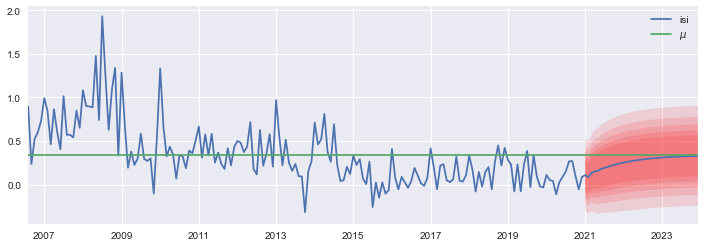

In [19]:

# Datos pronosticados
fcast = pd.DataFrame({'isi':ff,'std':std}, index=pd.period_range(isi.index[-1]+1, periods=horizon, freq='M'))

# Concatenar los datos observados con los pronosticados
fcast2 = pd.concat([isi,fcast], sort=False)
fcast2['$\mu$'] = isi.values.mean()

# Graficar la serie y el pronóstico
fig, ax =plt.subplots(figsize=[12,4])
fcast2[['isi','$\mu$']].plot(ax=ax)



def intervalo(z):
    """
    Para calcular los límites superior e inferior del intervalo de confianza,
    dado el valor crítico de la distribución normal
    """
    return fcast2['isi']+z*fcast2['std'],  fcast2['isi']-z*fcast2['std']

# fechas para graficar los intervalos
d = fcast2.index.values

# Graficar los intervalos de confianza
for z in zvalues:
    ax.fill_between(d, *intervalo(z), facecolor='red', alpha=0.12, interpolate=True)

fig.savefig('ISI-AR3forecast.pdf', bbox_inches='tight')

In [20]:
isi.index = isi.index.to_series().astype(str)
isi.to_stata('isi.dta')